## Exploring trade-off between house price and age in Boston dataset
Generally, there is a trade-off between house price and age. But you may want to buy a ralatively new one as cheap as possible.

Then, what kind of building should we look for?

In this tutorial,

1. Train two machine learning models for house prices and age in boston dataset usign sklearn.

2. Find out pareto-optimum inputs of price and age using optga.

### 1. Creating machine learining model
First, create predictive models for price and age.

Since building a sophisticated predictive model is not the purpose of this tutorial, we will use a simple random forest model without hyperparameter tuning and cross-validation.

In [1]:
#: Load boston housing price datasets
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()
df =  pd.DataFrame(boston.data, columns=boston.feature_names)

X = df.drop(["AGE"], 1)
y_price = pd.DataFrame(boston.target, columns=["Price"])
y_age = pd.DataFrame(df["AGE"])


In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33


**Note: Constraints should be added:**

CHAS: [0, 1]

ZN: [0, 100]

RAD: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 24]


In [3]:
#: create predictive model
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

model_price = RandomForestRegressor().fit(X, y_price)
model_age = RandomForestRegressor().fit(X, y_age)

### 2. Optimize input to achive low cost and new building

In [4]:
import optga
from optga.optimizer import Optimizer
optga.__version__

'0.1.3'

In [5]:
optimizer = Optimizer(sample_data=X)

optimizer.add_objective("Price", model_price, direction="minimize")
optimizer.add_objective("Age", model_age, direction="minimize")

optimizer.add_discrete_constraint("CHAS", [0, 1])
optimizer.add_discrete_constraint("ZN", [0, 100])
optimizer.add_discrete_constraint("RAD", list(range(1, 9)) + [24])

In [6]:
#: confirm optimization config
optimizer.show_config()

{
  "mate": "MateCxTwoPoints",
  "mutate": "MutateUniform",
  "select": "SelectNSGA2",
  "birth_rate": 3,
  "mutpb": 0.2,
  "indpb": 0.1,
  "objectives": {
    "Price": "minimize",
    "Age": "minimize"
  },
  "limits": {
    "CRIM": [
      0.00632,
      88.9762
    ],
    "ZN": [
      0.0,
      100.0
    ],
    "INDUS": [
      0.46,
      27.74
    ],
    "CHAS": [
      0.0,
      1.0
    ],
    "NOX": [
      0.385,
      0.871
    ],
    "RM": [
      3.561,
      8.78
    ],
    "DIS": [
      1.1296,
      12.1265
    ],
    "RAD": [
      1.0,
      24.0
    ],
    "TAX": [
      187.0,
      711.0
    ],
    "PTRATIO": [
      12.6,
      22.0
    ],
    "B": [
      0.32,
      396.9
    ],
    "LSTAT": [
      1.73,
      37.97
    ]
  },
  "discrete_constraints": {
    "CHAS": [
      0,
      1
    ],
    "ZN": [
      0,
      100
    ],
    "RAD": [
      1,
      2,
      3,
      4,
      5,
      6,
      7,
      8,
      24
    ]
  },
  "onehot_groups": null,
  

In [7]:
%time
#: run optimization
optimizer.run(n_gen=300, population_size=300)

(INFO)[2020-01-04 19:03:41,993]
Settings:
None


Wall time: 0 ns
{
  "mate": "MateCxTwoPoints",
  "mutate": "MutateUniform",
  "select": "SelectNSGA2",
  "birth_rate": 3,
  "mutpb": 0.2,
  "indpb": 0.1,
  "objectives": {
    "Price": "minimize",
    "Age": "minimize"
  },
  "limits": {
    "CRIM": [
      0.00632,
      88.9762
    ],
    "ZN": [
      0.0,
      100.0
    ],
    "INDUS": [
      0.46,
      27.74
    ],
    "CHAS": [
      0.0,
      1.0
    ],
    "NOX": [
      0.385,
      0.871
    ],
    "RM": [
      3.561,
      8.78
    ],
    "DIS": [
      1.1296,
      12.1265
    ],
    "RAD": [
      1.0,
      24.0
    ],
    "TAX": [
      187.0,
      711.0
    ],
    "PTRATIO": [
      12.6,
      22.0
    ],
    "B": [
      0.32,
      396.9
    ],
    "LSTAT": [
      1.73,
      37.97
    ]
  },
  "discrete_constraints": {
    "CHAS": [
      0,
      1
    ],
    "ZN": [
      0,
      100
    ],
    "RAD": [
      1,
      2,
      3,
      4,
      5,
      6,
      7,
      8,
      24
    ]
  },
  "onehot_g

(INFO)[2020-01-04 19:03:42,261]
====Generation 0 ====
(INFO)[2020-01-04 19:03:42,262]
         MAX    MIN    Average
Price  42.54   7.69  20.741708
Age    98.09  10.93  70.854067
(INFO)[2020-01-04 19:03:44,684]
====Generation 10 ====
(INFO)[2020-01-04 19:03:44,684]
         MAX   MIN    Average
Price  44.98  5.48  17.043758
Age    95.66  7.89  42.338058
(INFO)[2020-01-04 19:03:46,872]
====Generation 20 ====
(INFO)[2020-01-04 19:03:46,872]
         MAX   MIN    Average
Price  43.44  5.48  13.313700
Age    94.18  7.85  48.364175
(INFO)[2020-01-04 19:03:49,049]
====Generation 30 ====
(INFO)[2020-01-04 19:03:49,049]
         MAX   MIN    Average
Price  40.50  5.48  15.929667
Age    97.09  6.79  35.837117
(INFO)[2020-01-04 19:03:51,189]
====Generation 40 ====
(INFO)[2020-01-04 19:03:51,189]
         MAX   MIN    Average
Price  33.18  5.48  13.871717
Age    91.72  6.79  41.829433
(INFO)[2020-01-04 19:03:53,359]
====Generation 50 ====
(INFO)[2020-01-04 19:03:53,374]
         MAX   MIN    Aver

### 3.Visualize Result

In [8]:
optimizer.export_result("boston_result")

Overwrite: boston_result


In [9]:
Y_init = pd.read_csv("boston_result/Y_init.csv")
Y_pareto = pd.read_csv("boston_result/Y_pareto.csv")


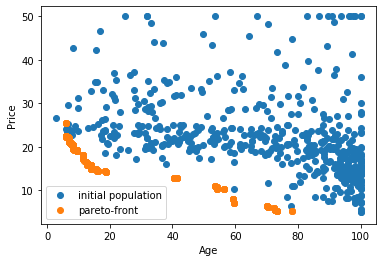

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_age, y_price, label="initial population")
plt.scatter(Y_pareto["Age"], Y_pareto["Price"], label="pareto-front")
plt.xlabel("Age")
plt.ylabel("Price")
plt.legend()